#  Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set plot style for better aesthetics

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Load the Data using NumPy

In [4]:
try:
    datos_precios = np.loadtxt(
        "manzanas.csv",      
        delimiter=",",       
        skiprows=1,          
        usecols=np.arange(1, 85) 
    )
    print("Data loaded successfully!")
except IOError:
    print("Error: 'manzanas.csv' not found. Please make sure the file is in the same directory.")
    # In case of error, create dummy data to allow the rest of the script to run
    datos_precios = np.random.rand(5, 84) * 100 + 50

Data loaded successfully!


# Initial Data Inspection

In [5]:
# Using the .ndim attribute to see the number of dimensions of our array.
print(f"Number of dimensions: {datos_precios.ndim}")

# Using the .shape attribute to see the form of our array (rows, columns).
print(f"Shape of the array: {datos_precios.shape}")
print("\nThis shows we have data for 5 cities (rows) over 84 months (columns).")

Number of dimensions: 2
Shape of the array: (5, 84)

This shows we have data for 5 cities (rows) over 84 months (columns).


# Transpose the Data for Time-Series Analysis

In [6]:
datos_transpuestos = datos_precios.T
print(f"Shape of transposed array: {datos_transpuestos.shape}")
print("\nNow we have 84 months (rows) and 5 cities (columns).")

Shape of transposed array: (84, 5)

Now we have 84 months (rows) and 5 cities (columns).


# Create a Pandas DataFrame for Enhanced Analysis

In [7]:
# List of cities from the dataset
ciudades = ["Moscow", "St. Petersburg", "Novosibirsk", "Yekaterinburg", "Krasnoyarsk"]

# Create a date range for our 84 months, from 2013-01 to 2019-12
# The dataset description says 2013-2020, but 84 months is exactly 7 years (2013-2019)
fechas = pd.date_range(start="2013-01", periods=84, freq='M')

# Create the DataFrame
df_precios = pd.DataFrame(data=datos_transpuestos, index=fechas, columns=ciudades)

print("DataFrame created successfully. Here are the first 5 rows:")
print(df_precios.head())

C:\Users\apicn\AppData\Local\Temp\ipykernel_70756\1331466928.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2013-01", periods=84, freq='M')


DataFrame created successfully. Here are the first 5 rows:
            Moscow  St. Petersburg  Novosibirsk  Yekaterinburg  Krasnoyarsk
2013-01-31   79.72           42.67        62.55          48.26        71.25
2013-02-28   81.08           44.37        62.73          51.01        71.35
2013-03-31   79.68           44.73        63.43          50.91        70.90
2013-04-30   79.80           46.75        63.83          53.94        71.92
2013-05-31   80.63             NaN        66.06          61.27        72.91


# Exploratory Data Analysis - Overall Price Trend

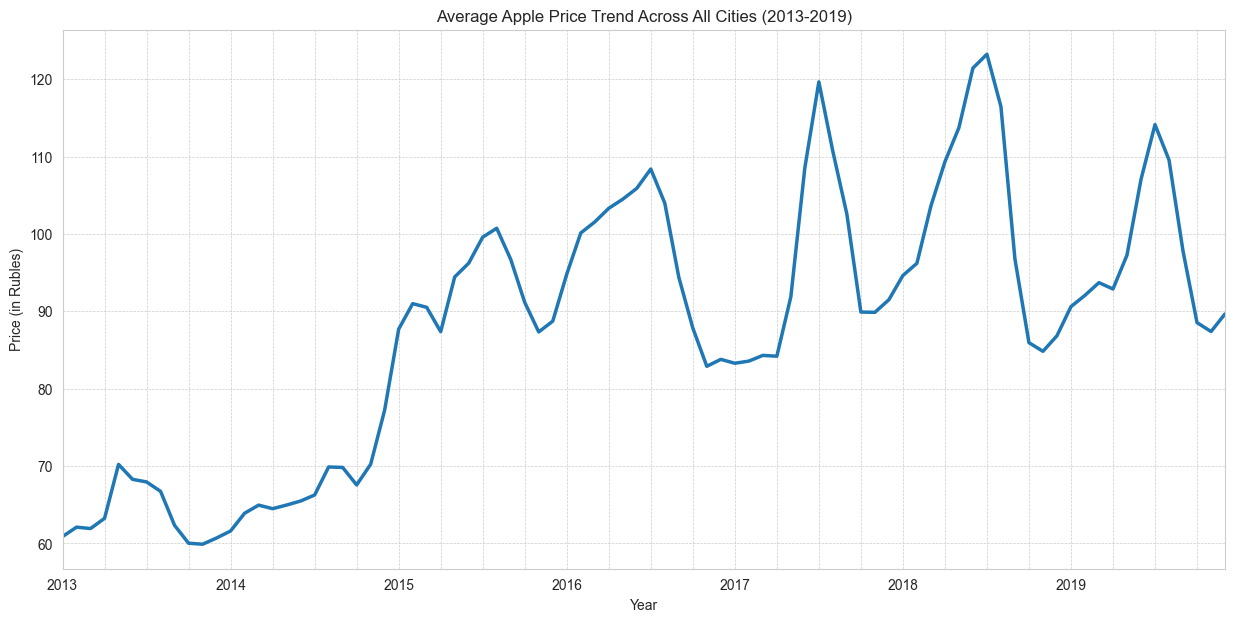

Analysis: The plot shows a clear upward trend in apple prices over the years, with significant seasonal fluctuations.


In [8]:
# Calculating the average price across all cities for each month.
df_precios['Average_Price'] = df_precios.mean(axis=1)

# Plot the average price trend
plt.figure()
df_precios['Average_Price'].plot(
    title='Average Apple Price Trend Across All Cities (2013-2019)',
    linewidth=2.5
)
plt.ylabel('Price (in Rubles)')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("Analysis: The plot shows a clear upward trend in apple prices over the years, with significant seasonal fluctuations.")
